In [1]:
import os
from typing import *


os.getcwd()
# Setting the baseline:
os.chdir('/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP')


curPath: str = os.getcwd() + "/src/CausalNexStudy/"

dataPath: str = curPath + "_data/"


print("curPath = ", curPath, "\n")
print("dataPath = ", dataPath, "\n")

curPath =  /development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/CausalNexStudy/ 

dataPath =  /development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/CausalNexStudy/_data/ 



In [2]:
import sys
# Making files in utils folder visible here: to import my local print functions for nn.Module objects
sys.path.append(os.getcwd() + "/src/utils/")
# For being able to import files within CausalNex folder
sys.path.append(curPath)
sys.path.append(curPath + 'fonts/')

sys.path

['/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/CausalNexStudy',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python37.zip',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/lib-dynload',
 '',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages/IPython/extensions',
 '/home/statisticallyfit/.ipython',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/utils/',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/CausalNexStudy/',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/CausalNexStudy/fonts/']

In [3]:
from causalnex.structure import StructureModel

model: StructureModel = StructureModel()

model.add_weighted_edges_from([
    ('process_type', 'injury_type', 8.343),
    ('uses_op', 'injury_type', 9.43),
    ('injury_type', 'absenteeism_level', 5.4123),

    ('process_type', 'absenteeism_level', 0.0001),
    ('process_type', 'uses_op', 8.9),
    ('uses_op', 'process_type', 1.1)
])

Now visualize:

/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages/pygraphviz/agraph.py:1367: RuntimeWarning: Warning: node 'process_type', graph '%3' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


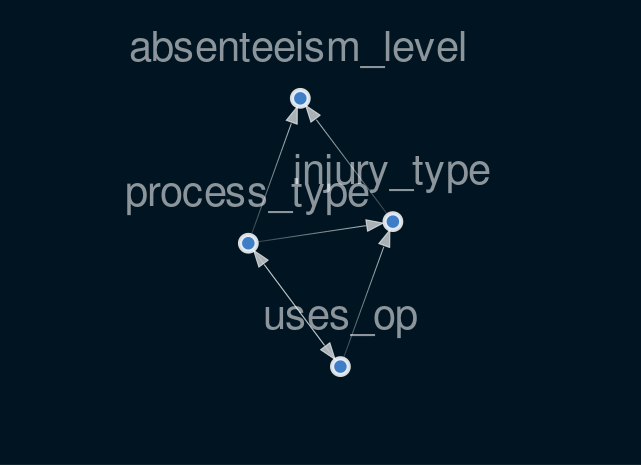

In [4]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

# Now visualize it:
viz = plot_structure(
    model,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
filename_demo = curPath + "demo.png"


viz.draw(filename_demo)
Image(filename_demo)

Showing with graphviz (my function)

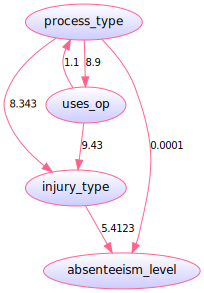

In [5]:
from src.utils.GraphvizUtil import *


structToGraph(weightedGraph = model)

Showing the nodes:

In [6]:
model.nodes

NodeView(('process_type', 'injury_type', 'uses_op', 'absenteeism_level'))

Showing the unique edges, which takes into account bidirectionality, as we see there is an edge from `process_type` --> `uses_op` and vice versa:

In [7]:
model.edges

OutEdgeView([('process_type', 'injury_type'), ('process_type', 'absenteeism_level'), ('process_type', 'uses_op'), ('injury_type', 'absenteeism_level'), ('uses_op', 'injury_type'), ('uses_op', 'process_type')])

Seeing the adjacency graph:

In [8]:
model.adj

AdjacencyView({'process_type': {'injury_type': {'origin': 'unknown', 'weight': 8.343}, 'absenteeism_level': {'origin': 'unknown', 'weight': 0.0001}, 'uses_op': {'origin': 'unknown', 'weight': 8.9}}, 'injury_type': {'absenteeism_level': {'origin': 'unknown', 'weight': 5.4123}}, 'uses_op': {'injury_type': {'origin': 'unknown', 'weight': 9.43}, 'process_type': {'origin': 'unknown', 'weight': 1.1}}, 'absenteeism_level': {}})

Must remove one edge from the nodes `process_type` --> `uses_op` because the `BayesianNetwork` class must take an a directed **acyclic** graph:

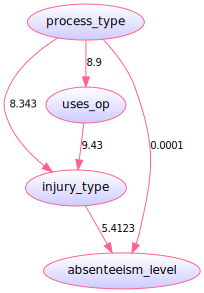

In [9]:
#from src.utils.VisualUtil import *


modelAcyclic: StructureModel = model.copy()
modelAcyclic.remove_edge(u = 'uses_op', v = 'process_type')

structToGraph(weightedGraph = modelAcyclic)

Fit the bayesian network. No need to create the `StructureModel` from data because we created it by hand and have already set its edge weights.

In [10]:
from causalnex.network import BayesianNetwork

bayesNet: BayesianNetwork = BayesianNetwork(modelAcyclic)

Fitting node states, using the input data:

In [11]:
import pandas as pd
from pandas.core.frame import DataFrame

from src.utils.DataUtil import *

inputData: DataFrame = pd.read_csv(dataPath + 'combData_tweak1.csv', delimiter = ',') #, keep_default_na=False)

data = cleanData(inputData.dropna())  # remove the NA rows (which are the empty ones) and clean the whitespaces

data

,process_type,uses_op,injury_type,absenteeism_level
0,Engine-Mount,Power-Gun,Electrical-Burn,Absenteeism-01
1,Engine-Mount,Power-Gun,Electrical-Burn,Absenteeism-01
2,Engine-Mount,Power-Gun,Electrical-Burn,Absenteeism-02
3,Engine-Mount,Power-Gun,Electrical-Burn,Absenteeism-02
4,Engine-Mount,Power-Gun,Electrical-Burn,Absenteeism-00
...,...,...,...,...
239,Door-Mount,Power-Gun,Electrical-Burn,Absenteeism-01
240,Door-Mount,Power-Gun,Electrical-Burn,Absenteeism-01
242,Door-Mount,Power-Gun,Contact-Contusion,Absenteeism-00
243,Door-Mount,Power-Gun,Contact-Contusion,Absenteeism-00


Fit all node states:

In [12]:
# bayesNet = bayes
bayesNet.fit_node_states(df = data)
bayesNet.node_states

{'process_type': {'Accel-Pedal',
  'Door-Mount',
  'Engine-Mount',
  'Engine-Wiring',
  'Oil-Fill',
  'Sun-Roof-Housing'},
 'uses_op': {'Forklift', 'Front-Right-Door', 'Oil', 'Power-Gun'},
 'injury_type': {'Chemical-Burn',
  'Contact-Contusion',
  'Electrical-Burn',
  'Electrical-Shock',
  'Fall-Gtm'},
 'absenteeism_level': {'Absenteeism-00',
  'Absenteeism-01',
  'Absenteeism-02',
  'Absenteeism-03'}}

Fitting the conditional probability distributions

In [13]:
bayesNet.fit_cpds(data, method="BayesianEstimator", bayes_prior="K2")

/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages/pandas/core/generic.py:5191: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages/pandas/core/generic.py:5192: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages/pgmpy/estimators/base.py:54: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  states = sorted(list(self.data.ix[:, variable].dropna().unique()))
/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages/pgmpy/estimator

The learned bayesian network still stores the underlying `StructureModel` and the edge values are the same as before - they are just edge **weights** and not edge **probabilities**.

In [14]:
list(bayesNet.structure.adjacency())

[('process_type',
  {'injury_type': {'origin': 'unknown', 'weight': 8.343},
   'absenteeism_level': {'origin': 'unknown', 'weight': 0.0001},
   'uses_op': {'origin': 'unknown', 'weight': 8.9}}),
 ('injury_type',
  {'absenteeism_level': {'origin': 'unknown', 'weight': 5.4123}}),
 ('uses_op', {'injury_type': {'origin': 'unknown', 'weight': 9.43}}),
 ('absenteeism_level', {})]

Showing the graph again for reference

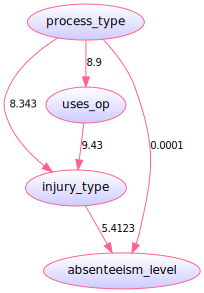

In [15]:

structToGraph(weightedGraph = modelAcyclic)

Because `process_type` has no incoming nodes, only outgoing nodes, its conditional distribution is also its *fully* marginal distribution - it is not conditional on any other variable.

In [16]:
bayesNet.cpds['process_type']

,
process_type,
Accel-Pedal,0.074627
Door-Mount,0.034826
Engine-Mount,0.447761
Engine-Wiring,0.174129
Oil-Fill,0.119403
Sun-Roof-Housing,0.149254


But `uses_op` has `process_type` as an incoming node, so its conditional distribution shows the values of `uses_op` conditional on values of `process_type`:

In [17]:
bayesNet.cpds['uses_op']

process_type,Accel-Pedal,Door-Mount,Engine-Mount,Engine-Wiring,Oil-Fill,Sun-Roof-Housing
uses_op,,,,,,
Forklift,0.25,0.25,0.25,0.25,0.25,0.25
Front-Right-Door,0.25,0.25,0.25,0.25,0.25,0.25
Oil,0.25,0.25,0.25,0.25,0.25,0.25
Power-Gun,0.25,0.25,0.25,0.25,0.25,0.25


`injury_type` is conditional on two variables, and its table reflects this:

In [18]:
bayesNet.cpds['injury_type']

process_type      Accel-Pedal                                 Door-Mount  \
uses_op              Forklift Front-Right-Door  Oil Power-Gun   Forklift   
injury_type                                                                
Chemical-Burn             0.2              0.2  0.2  0.210526        0.2   
Contact-Contusion         0.2              0.2  0.2  0.210526        0.2   
Electrical-Burn           0.2              0.2  0.2  0.157895        0.2   
Electrical-Shock          0.2              0.2  0.2  0.210526        0.2   
Fall-Gtm                  0.2              0.2  0.2  0.210526        0.2   

process_type                                      Engine-Mount  \
uses_op           Front-Right-Door  Oil Power-Gun     Forklift   
injury_type                                                      
Chemical-Burn                  0.2  0.2  0.090909     0.097561   
Contact-Contusion              0.2  0.2  0.363636     0.268293   
Electrical-Burn                0.2  0.2  0.363636     0.097561   
Electrical-Shock               0.2  0.2  0.090909     0.268293   
Fall-Gtm                       0.2  0.2  0.090909     0.268293   

process_type                        ... Engine-Wiring           Oil-Fill  \
uses_op           Front-Right-Door  ...           Oil Power-Gun Forklift   
injury_type                         ...                                    
Chemical-Burn             0.055556  ...        0.3750  0.045455      0.2   
Contact-Contusion         0.555556  ...        0.0625  0.181818      0.2   
Electrical-Burn           0.222222  ...        0.0625  0.363636      0.2   
Electrical-Shock          0.111111  ...        0.2500  0.363636      0.2   
Fall-Gtm                  0.055556  ...        0.2500  0.045455      0.2   

process_type                                           Sun-Roof-Housing  \
uses_op           Front-Right-Door       Oil Power-Gun         Forklift   
injury_type                                                               
Chemical-Burn                  0.2  0.071429  0.210526         0.047619   
Contact-Contusion              0.2  0.285714  0.210526         0.333333   
Electrical-Burn                0.2  0.500000  0.157895         0.190476   
Electrical-Shock               0.2  0.071429  0.210526         0.047619   
Fall-Gtm                       0.2  0.071429  0.210526         0.380952   

process_type                                       
uses_op           Front-Right-Door  Oil Power-Gun  
injury_type                                        
Chemical-Burn                  0.2  0.2  0.055556  
Contact-Contusion              0.2  0.2  0.222222  
Electrical-Burn                0.2  0.2  0.444444  
Electrical-Shock               0.2  0.2  0.222222  
Fall-Gtm                       0.2  0.2  0.055556  

[5 rows x 24 columns]

`absenteeism_level` is only **directly** conditional on two variables, the `injury_type` and `process_type`, which is visible in its conditional probability distribution table below:

In [19]:
bayesNet.cpds['absenteeism_level']

injury_type       Chemical-Burn                                        \
process_type        Accel-Pedal Door-Mount Engine-Mount Engine-Wiring   
absenteeism_level                                                       
Absenteeism-00         0.571429       0.25     0.769231      0.111111   
Absenteeism-01         0.142857       0.25     0.076923      0.111111   
Absenteeism-02         0.142857       0.25     0.076923      0.333333   
Absenteeism-03         0.142857       0.25     0.076923      0.444444   

injury_type                                  Contact-Contusion             \
process_type       Oil-Fill Sun-Roof-Housing       Accel-Pedal Door-Mount   
absenteeism_level                                                           
Absenteeism-00     0.142857             0.25          0.571429   0.571429   
Absenteeism-01     0.142857             0.25          0.142857   0.142857   
Absenteeism-02     0.428571             0.25          0.142857   0.142857   
Absenteeism-03     0.285714             0.25          0.142857   0.142857   

injury_type                                   ... Electrical-Shock  \
process_type      Engine-Mount Engine-Wiring  ...     Engine-Mount   
absenteeism_level                             ...                    
Absenteeism-00         0.31250      0.571429  ...         0.125000   
Absenteeism-01         0.03125      0.142857  ...         0.291667   
Absenteeism-02         0.18750      0.142857  ...         0.291667   
Absenteeism-03         0.46875      0.142857  ...         0.291667   

injury_type                                                   Fall-Gtm  \
process_type      Engine-Wiring  Oil-Fill Sun-Roof-Housing Accel-Pedal   
absenteeism_level                                                        
Absenteeism-00         0.071429  0.142857         0.142857    0.571429   
Absenteeism-01         0.071429  0.142857         0.142857    0.142857   
Absenteeism-02         0.285714  0.428571         0.285714    0.142857   
Absenteeism-03         0.571429  0.285714         0.428571    0.142857   

injury_type                                                        \
process_type      Door-Mount Engine-Mount Engine-Wiring  Oil-Fill   
absenteeism_level                                                   
Absenteeism-00          0.25          0.3      0.571429  0.571429   
Absenteeism-01          0.25          0.1      0.142857  0.142857   
Absenteeism-02          0.25          0.1      0.142857  0.142857   
Absenteeism-03          0.25          0.5      0.142857  0.142857   

injury_type                         
process_type      Sun-Roof-Housing  
absenteeism_level                   
Absenteeism-00            0.090909  
Absenteeism-01            0.181818  
Absenteeism-02            0.363636  
Absenteeism-03            0.363636  

[4 rows x 30 columns]

In [20]:
# Showing the final rendered graph with the conditional probability distributions alongside the nodes:

In [21]:
#Image(filename = curPath + 'modelWithCPDs.png')
graph = structToGraph(weightedGraph = model)
#graphProbs = renderGraphProbabilities(givenGraph = graph, variables = ???)